In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
train_data=pd.read_csv("/kaggle/input/titanic/train.csv")

women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [4]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [5]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


***My testing***


Let's take a look at the correlation map.

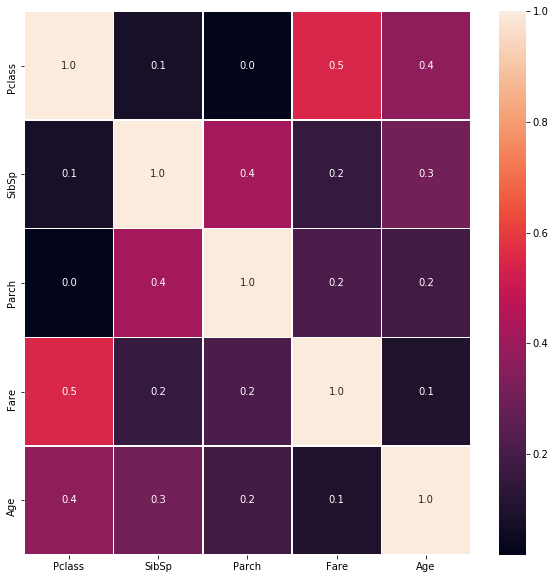

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool

features = ["Pclass", "Sex", "SibSp", "Parch","Fare","Age"]
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(abs(train_data[features].corr()), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

High correllation between Fare and class, between Parch and SibSp (as expected) but also between Age and class (less expected). Let's take a closer look.

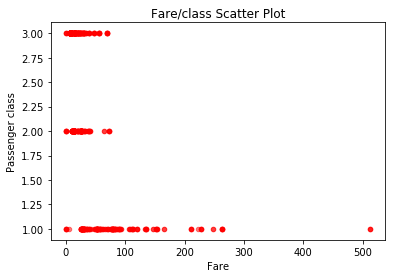

In [7]:
train_data.plot(kind='scatter', x='Fare', y='Pclass',alpha = 0.5,color = 'red')
plt.xlabel('Fare')              # label = name of label
plt.ylabel('Passenger class')
plt.title('Fare/class Scatter Plot')
plt.show()

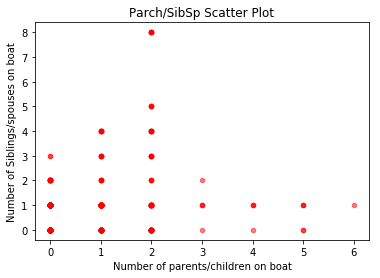

In [8]:
train_data.plot(kind='scatter', x='Parch', y='SibSp',alpha = 0.5,color = 'red')
plt.xlabel('Number of parents/children on boat')              # label = name of label
plt.ylabel('Number of Siblings/spouses on boat')
plt.title('Parch/SibSp Scatter Plot')
plt.show()

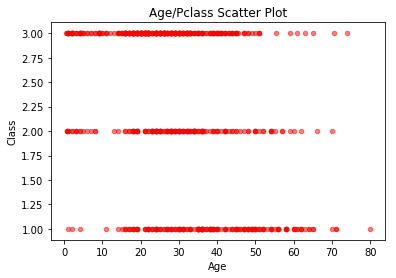

In [9]:
train_data.plot(kind='scatter', x='Age', y='Pclass',alpha = 0.5,color = 'red')
plt.xlabel('Age')              # label = name of label
plt.ylabel('Class')
plt.title('Age/Pclass Scatter Plot')
plt.show()

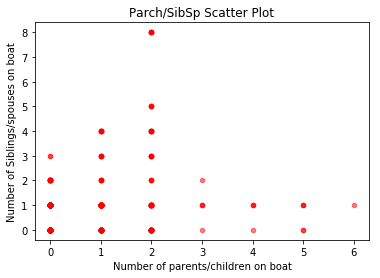

In [10]:
train_data.plot(kind='scatter', x='Parch', y='SibSp',alpha = 0.5,color = 'red')
plt.xlabel('Number of parents/children on boat')              # label = name of label
plt.ylabel('Number of Siblings/spouses on boat')
plt.title('Parch/SibSp Scatter Plot')
plt.show()

Actually, we can regroup all this in a scatterplot matrix. 
A scatterplot matrix allows us to visualize:
*     on the diagonal, the density estimation for each feature
*     on each of the off-diagonal plots, a scatterplot between two features. Each dot represents an instance.


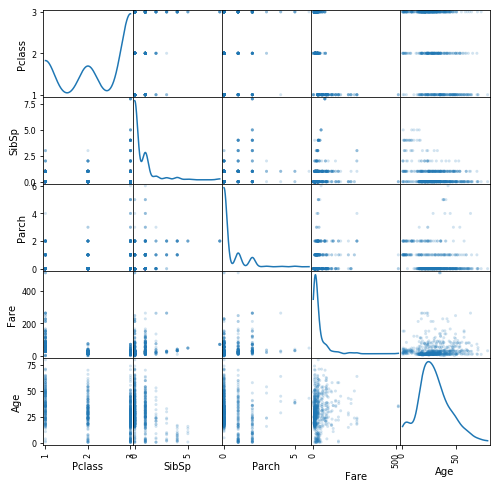

In [11]:
#from pandas.tools.plotting import scatter_matrix
pd.plotting.scatter_matrix(train_data.get(features), alpha=0.2,
               figsize=(8, 8), diagonal='kde');

Some of these features have heavy tails. We can log-transform them.

In [12]:
data_plot = train_data.assign(LogFare=lambda x : np.log(x.Fare + 1.))

log_features = ["Pclass", "Sex", "SibSp", "Parch","LogFare","Age"]

data_plot.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LogFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.110213
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.280593
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.188856
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.990834
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2.202765


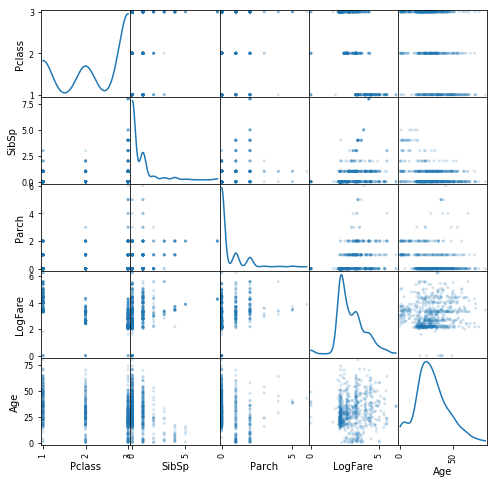

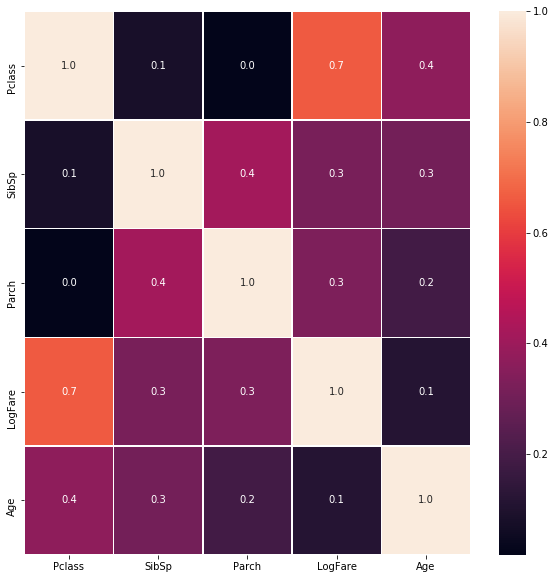

In [13]:
pd.plotting.scatter_matrix(data_plot.get(log_features), alpha=0.2, figsize=(8, 8), diagonal='kde');

f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(abs(data_plot.get(log_features).corr()), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

So we'll just take fare into account. Now let's see how all this is correlated to surviving.

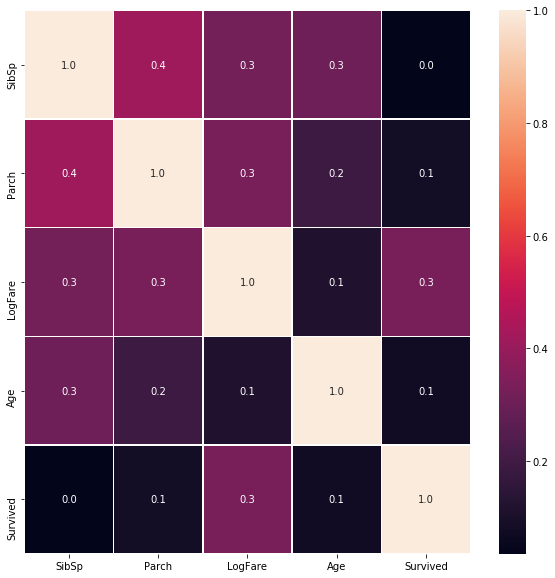

In [14]:
log_features = ["Sex", "SibSp", "Parch","LogFare","Age","Survived"]
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(abs(data_plot.get(log_features).corr()), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

Before we run the model, let's check for missing valus in our features.

In [15]:
log_features = ["Sex", "SibSp", "Parch","LogFare","Age"]
type(log_features)

data_plot[log_features+['Survived']].groupby('Survived').count()

,Sex,SibSp,Parch,LogFare,Age
Survived,,,,,
0,549,549,549,549,424
1,342,342,342,342,290


Okay so there is some missing age data. Let's try to see how we can fill it.

In [16]:
train_data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [17]:
data_plot.fillna(train_data['Age'].mean(),inplace=True)

log_features = ["Sex", "SibSp", "Parch","LogFare","Age"]
type(log_features)

data_plot[log_features+['Survived']].groupby('Survived').count()

,Sex,SibSp,Parch,LogFare,Age
Survived,,,,,
0,549,549,549,549,549
1,342,342,342,342,342


In [18]:
test_data = test_data.assign(LogFare=lambda x : np.log(x.Fare + 1.))

test_data[log_features].count()

Sex        418
SibSp      418
Parch      418
LogFare    417
Age        332
dtype: int64

Let's also fill in the missing data in the test data.

In [19]:
test_data['Age'].fillna(train_data['Age'].mean(),inplace=True)

data_plot['LogFare'].describe()

count    891.000000
mean       2.962246
std        0.969048
min        0.000000
25%        2.187218
50%        2.737881
75%        3.465736
max        6.240917
Name: LogFare, dtype: float64

In [20]:
test_data['LogFare'].describe()

count    417.000000
mean       3.016087
std        0.967998
min        0.000000
25%        2.185579
50%        2.737881
75%        3.481240
max        6.240917
Name: LogFare, dtype: float64

In [21]:
test_data[log_features].count()

Sex        418
SibSp      418
Parch      418
LogFare    417
Age        418
dtype: int64

In [22]:
test_data['LogFare'].fillna(data_plot['LogFare'].median(),inplace=True)

Now we classify using a random forest

In [23]:
y = train_data["Survived"]

X = pd.get_dummies(data_plot[log_features])
X_test = pd.get_dummies(test_data[log_features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission2.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


Now let's try classifying with SVM:

In [24]:
from sklearn import svm

clf = svm.SVC(C=100.0, kernel='rbf', gamma='scale') #C = regularization parameter (big for no reg)
clf.fit(X, y)

predictions=clf.predict(X_test)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission2_svm.csv', index=False)

With a neural network :

In [25]:
from sklearn.neural_network import MLPClassifier

Network = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic',solver='adam', alpha=0.0001)

from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()  
scaler.fit(X)
X_scaled = scaler.transform(X)
# apply same transformation to test data
X_test_scaled = scaler.transform(X_test)  # doctest: +SKIP

Network.fit(X_scaled, y)
predictions=Network.predict(X_test)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission2_NN.csv', index=False)

Finally, logistic regression :

In [26]:
from sklearn.linear_model import LogisticRegression

Logreg=LogisticRegression()

Logreg.fit(X_scaled, y)
predictions = Logreg.predict(X_test_scaled)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission2_logreg.csv', index=False)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
